This notebook compiles all of the intensity measurements into a latex table.

In [1]:
# IMPORT PACKAGES

#global
import numpy as np
from matplotlib import pyplot as plt
import astropy
import astropy.io.fits as pyfits
from astropy.table import Table, join
from astropy.wcs import WCS
from astropy.io import ascii
from astropy.io import fits
import os


In [2]:
# import intensity measurements data
# import SNeCO data

dataFile = '../Data/3.SNe+GalData.csv'
SNe_Gal_Data = Table.read(dataFile, format='csv') 

dataFile = '../Data/3.IntenData.csv'
IntenTable = Table.read(dataFile, format='csv') 

dataTable = join(SNe_Gal_Data, IntenTable, keys=('galaxy', 'SN_name'))


In [3]:
dataTable

galaxy,SN_name,SN_type,SN_ra,SN_dec,SN_xCoord,SN_yCoord,SN_co21int,SN_co21err,SN_co21ew,map_beamsize,orient_ra,orient_dec,dist,orient_posang,orient_incl,size_r25,telOrient,ImageFile150,ErrFile150,AlphaCOFile,PACovFile,IFRFile,MixedMaps,IFRResizedMaps,MassMaps,NatRes,NatInt,pc60Int,pc90Int,pc120Int,pc150Int,pc500Int,pc750Int,pc1000Int,NatErr,pc60Err,pc90Err,pc120Err,pc150Err,pc500Err,pc750Err,pc1000Err,NatEW,pc60EW,pc90EW,pc120EW,pc150EW,pc500EW,pc750EW,pc1000EW,NatSNR,pc60SNR,pc90SNR,pc120SNR,pc150SNR,pc500SNR,pc750SNR,pc1000SNR,alphaCO,pc60mgsd,pc90mgsd,pc120mgsd,pc150mgsd,pc500mgsd,pc750mgsd,pc1000mgsd,pc60mgsdErr,pc90mgsdErr,pc120mgsdErr,pc150mgsdErr,pc500mgsdErr,pc750mgsdErr,pc1000mgsdErr
str8,str11,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str9,str112,str113,str80,str112,str97,str37,str54,str35,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
circinus,SN1996cr,II,213.2918,-65.3457,86.56761411031889,84.63433198287285,186.84804,2.137819,34.56537,0.002032163908078,213.29124,-65.33915,4.2,36.74,64.3,262.49515,7m+tp,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_mom0.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_broad_emom0.fits,/data/kant/0/sun.1608/PHANGS/ALMA/alphaCO/v1p0/ESO097-013_alphaCO21_scaling.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/circinus/circinus_7m+tp_co21_150pc_coverage2d.fits,/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/z0mgs/eso097-013_w1_gauss7p5.fits,../Data/MixedMaps/circinus_Mixed.fits,../Data/ReprojectedInfraredMaps/circinus_reshaped.fits,../Data/MassMaps/circinus_Mass.fits,148.96539476404914,186.84803771972656,nan,nan,nan,186.84803771972656,111.39796447753906,97.68943786621094,81.1122817993164,2.1378190517425537,nan,nan,nan,2.1378190517425537,0.24664470553398132,0.17664189636707306,0.16147032380104065,34.56536865234375,nan,nan,nan,34.56536865234375,49.76144790649414,69.42247772216797,86.25480651855469,87.40124079604642,nan,nan,nan,87.40124079604642,451.65358095307374,553.036623107839,502.3355368956884,4.968773833170559,nan,nan,nan,928.4056406010429,553.5112909644595,485.39672264677006,403.02858335319996,nan,nan,nan,10.622339364351898,1.2255217589473042,0.8776936325103383,0.802309519736188
ngc0253,SN1940E,I,11.8783,-25.2934,296.9010534051223,236.26662905273994,219.30367,1.465811,45.862267,0.00232543637022,11.887966,-25.288443,3.7,52.48,75.0,803.7504,7m+tp,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0253/ngc0253_7m+tp_co21_150pc_broad_mom0.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0253/ngc0253_7m+tp_co21_150pc_broad_emom0.fits,/data/kant/0/sun.1608/PHANGS/ALMA/alphaCO/v1p0/NGC0253_alphaCO21_scaling.fits,/data/tycho/0/leroy.42/reduction/alma/phangs-alma/derived/ngc0253/ngc0253_7m+tp_co21_150pc_coverage2d.fits,/data/tycho/0/leroy.42/projects/phangs_survey_2019/working_data/irac/ngc0253_irac1_gauss7p5.fits,../Data/MixedMaps/ngc0253_Mixed.fits,../Data/ReprojectedInfraredMaps/ngc0253_reshaped.fits,../Data/MassMaps/ngc0253_Mass.fits,150.1701284517627,219.3036651611328,nan,nan,nan,219.3036651611328,153.83908081054688,153.87240600585938,142.72422790527344,1.465811014175415,nan,nan,nan,1.465811014175415,0.18237826228141785,0.11332354694604874,0.09203742444515228,45.862266540527344,nan,nan,nan,45.862266540527344,60.678550720214844,65.11054229736328,69.24812316894531,149.61251009871899,nan,nan,nan,149.61251009871899,843.5165402177496,1357.8149480188367,1550.7194900953239,4.479999295527333,nan,nan,nan,982.4802654284371,689.1989736

In [4]:
# pull galaxy names and telescope orientation to generate the file lists

galaxies  = dataTable['galaxy']
SNname    = dataTable['SN_name']
SNtype    = dataTable['SN_type']
pc60Int   = dataTable['pc60Int']
pc90Int   = dataTable['pc90Int']
pc120Int  = dataTable['pc120Int']
pc150Int  = dataTable['pc150Int']
pc60Err   = dataTable['pc60Err']
pc90Err   = dataTable['pc90Err']
pc120Err  = dataTable['pc120Err']
pc150Err  = dataTable['pc150Err']

In [5]:
def makeIntStr(intVal, errVal):
    
    string = str(round(intVal,2)) + " $\pm$ " + str(round(errVal,2))
    
    return(string)

Arr60, Arr90, Arr120, Arr150 = [],[],[],[]

for i in range(len(galaxies)):
    
    if(np.isfinite(pc60Int[i])==True):
        string = makeIntStr(pc60Int[i], pc60Err[i])
        Arr60.append(string)
    else:
        Arr60.append("nan")
        
    if(np.isfinite(pc90Int[i])==True):
        string = makeIntStr(pc90Int[i], pc90Err[i])
        Arr90.append(string)
    else:
        Arr90.append("nan")
        
    if(np.isfinite(pc120Int[i])==True):
        string = makeIntStr(pc120Int[i], pc120Err[i])
        Arr120.append(string)
    else:
        Arr120.append("nan")
        
    if(np.isfinite(pc150Int[i])==True):
        string = makeIntStr(pc150Int[i], pc150Err[i])
        Arr150.append(string)
    else:
        Arr150.append("nan")
        
print(Arr60)

['nan', 'nan', '4.94 $\\pm$ 1.73', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', '3.04 $\\pm$ 0.64', '62.43 $\\pm$ 0.73', '38.5 $\\pm$ 0.58', '164.3 $\\pm$ 0.96', '2.35 $\\pm$ 0.67', 'nan', '7.42 $\\pm$ 1.46', 'nan']


In [6]:
intenTexTable = Table({"Supernova"  :  SNname,
                       "Type"       :  SNtype,
                       "Galaxy"     :  galaxies,
                       "60pc"       :  Arr60,
                       "90pc"       :  Arr90,
                       "120pc"      :  Arr120,
                       "150pc"      :  Arr150
                      })

In [7]:
ascii.write(intenTexTable, '../Data/3.IntenTexTable.tex', format='latex', fast_writer=False, overwrite=True)  

In [8]:
for i in range(len(galaxies)):
    print(Arr150[i], galaxies[i])

186.85 $\pm$ 2.14 circinus
219.3 $\pm$ 1.47 ngc0253
1.34 $\pm$ 0.86 ngc0628
nan ngc1068
12.75 $\pm$ 0.91 ngc1087
260.37 $\pm$ 1.49 ngc1097
0.0 $\pm$ 0.53 ngc1097
5.27 $\pm$ 0.98 ngc1365
2.8 $\pm$ 1.14 ngc1365
-2.53 $\pm$ 0.92 ngc1365
0.14 $\pm$ 0.43 ngc1433
1.61 $\pm$ 0.56 ngc1511
13.63 $\pm$ 1.21 ngc1559
2.06 $\pm$ 0.96 ngc1559
0.0 $\pm$ 0.33 ngc1559
3.68 $\pm$ 0.93 ngc1559
61.47 $\pm$ 1.4 ngc1566
15.37 $\pm$ 1.14 ngc1566
2.96 $\pm$ 0.3 ngc1637
nan ngc1672
0.15 $\pm$ 1.29 ngc2775
101.06 $\pm$ 0.83 ngc2997
13.2 $\pm$ 0.49 ngc2997
0.0 $\pm$ 0.51 ngc3239
11.6 $\pm$ 0.78 ngc3627
28.27 $\pm$ 0.87 ngc3627
114.99 $\pm$ 1.11 ngc3627
3.64 $\pm$ 0.92 ngc3627
13.97 $\pm$ 0.7 ngc4254
2.1 $\pm$ 0.54 ngc4254
9.97 $\pm$ 0.74 ngc4254
44.81 $\pm$ 0.95 ngc4254
-0.93 $\pm$ 0.97 ngc4303
1.76 $\pm$ 1.95 ngc4303
2.02 $\pm$ 1.1 ngc4303
6.38 $\pm$ 0.9 ngc4303
-0.71 $\pm$ 1.31 ngc4303
1.28 $\pm$ 1.0 ngc4303
1.36 $\pm$ 1.07 ngc4303
5.92 $\pm$ 0.97 ngc4321
17.33 $\pm$ 1.08 ngc4321
1.11 $\pm$ 0.81 ngc4321
0.45 $

Text(0, 0.5, 'CO(2-1) Intensity at 150 pc')

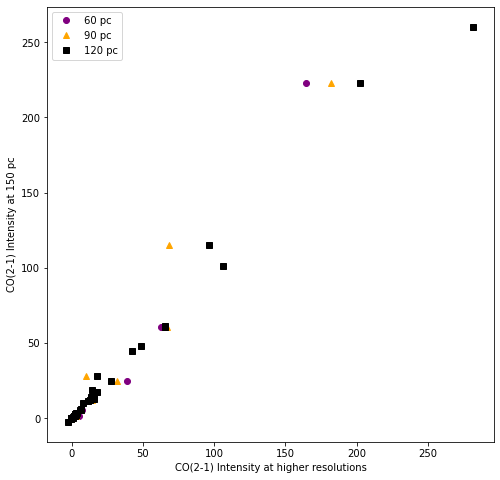

In [25]:
x60v150, y60v150 = [],[]
x90v150, y90v150 = [],[]
x120v150, y120v150 = [],[]

#get intensity v intensity arrays
for i in range(len(SNname)):
    if (np.isfinite(pc60Int[i])and np.isfinite(pc150Int[i])):
        x60v150.append(pc60Int[i])
        y60v150.append(pc150Int[i])
    if (np.isfinite(pc90Int[i])and np.isfinite(pc150Int[i])):
        x90v150.append(pc90Int[i])
        y90v150.append(pc150Int[i])
    if (np.isfinite(pc120Int[i])and np.isfinite(pc150Int[i])):
        x120v150.append(pc120Int[i])
        y120v150.append(pc150Int[i])
    
fig = plt.figure(figsize=(8,8))   

plt.plot(x60v150,y60v150,color="purple", marker="o",ls="", label="60 pc")
plt.plot(x90v150,y90v150,color="orange", marker="^",ls="", label="90 pc")
plt.plot(x120v150,y120v150,color="black", marker="s",ls="", label="120 pc")
plt.legend(loc="best")
plt.xlabel("CO(2-1) Intensity at higher resolutions")
plt.ylabel("CO(2-1) Intensity at 150 pc")